## 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。

$$
y = \frac{1}{2}x + 1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [74]:
import numpy as np

#作成する配列の設定
start = -50.0
end = 50.0
step = 0.1

x_ndarray = np.arange(start, end + step, step)
y_ndarray = (1/2) *  x_ndarray  + 1

print("x_ndarray :{}, {}" .format(x_ndarray, x_ndarray.shape))
print("y_ndarray :{}, {}" .format(y_ndarray, y_ndarray.shape))

x_ndarray :[-50.  -49.9 -49.8 ...  49.8  49.9  50. ], (1001,)
y_ndarray :[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ], (1001,)


## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [90]:
import numpy as np

#作成する配列の設定
start = -50.0
end = 50.0
step = 0.1

x_ndarray = np.arange(start, end + step, step)
y_ndarray = (1/2) *  x_ndarray  + 1

x_ndarray = x_ndarray.reshape(1001,1)
y_ndarray = y_ndarray.reshape(1001,1)

x_y_ndarray = np.hstack((x_ndarray , y_ndarray))
print(x_y_ndarray.shape)

x_ndarray :[-50.  -49.9 -49.8 ...  49.8  49.9  50. ], (1001,)
y_ndarray :[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ], (1001,)
(1001, 2)


## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。
各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

In [119]:
import numpy as np

#作成する配列の設定
start = -50.0
end = 50.0
step = 0.1

x_ndarray = np.arange(start, end + step, step)
y_ndarray = (1/2) *  x_ndarray  + 1

x_ndarray = x_ndarray.reshape(1001,1)
y_ndarray = y_ndarray.reshape(1001,1)
x_y_ndarray = np.hstack((x_ndarray , y_ndarray))

#x, yの偏差量を求めるため、各x,y値を１データ分ずらしたx2, y2を作成する。
x1_ndarray = x_y_ndarray [:-1,0].reshape(1000,1)
x2_ndarray = x_y_ndarray [1:,0].reshape(1000,1)
y1_ndarray = x_y_ndarray [:-1,1].reshape(1000,1)
y2_ndarray = x_y_ndarray [1:,1].reshape(1000,1)

#各x座標における勾配:gradient_ndarrayへ格納する。
gradient_ndarray = (y2_ndarray - y1_ndarray) / (x2_ndarray - x1_ndarray)
print(gradient_ndarray.shape)

(1000, 1)


## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

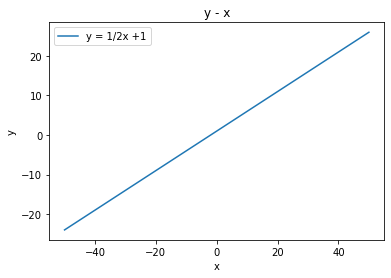

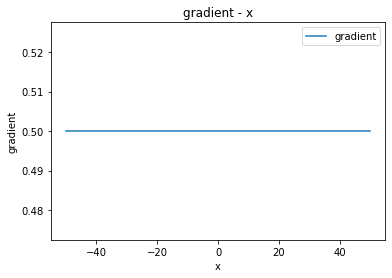

In [124]:
from matplotlib import pyplot as plt

plt.plot(x_y_ndarray[:,0], x_y_ndarray[:,1], label="y = 1/2x +1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y - x")
plt.legend()
plt.show()

plt.plot(x_y_ndarray[:-1,0], gradient_ndarray, label="gradient")
plt.xlabel("x")
plt.ylabel("gradient")
plt.title("gradient - x")
plt.legend()
plt.show()

### 【問題5】Pythonの関数化

問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。

そして、 $y = x^{2},y = 2x^{2}+2^{x},y = sin(x^{\frac{1}{2}})$ についての勾配を求めてください。$x$ の範囲は前2つが-50から50、最後の1つが0から50です。0.1間隔でndarrayを作成してください。

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには `np.sin()`を用います。

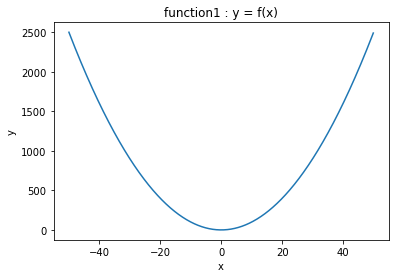

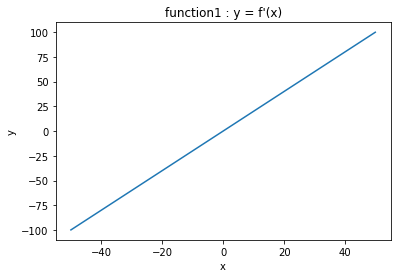

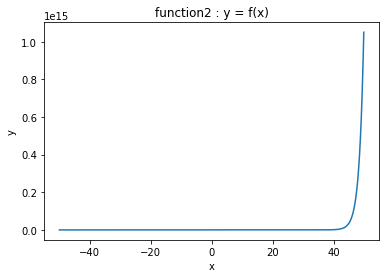

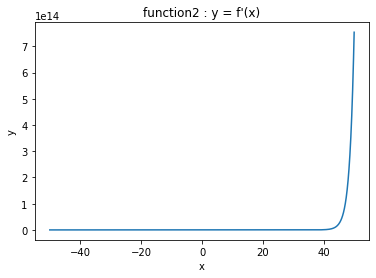

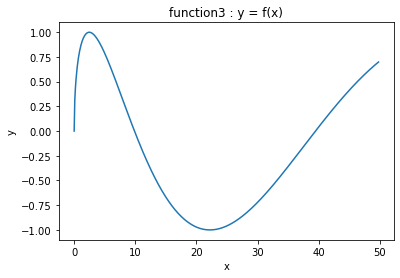

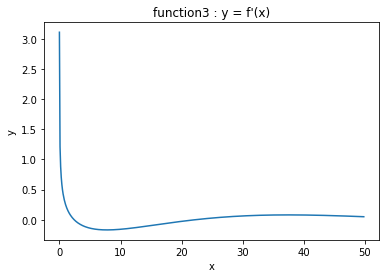

In [206]:
from matplotlib import pyplot as plt
import numpy as np

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    
    array_x = array_x.reshape(len(array_x), 1)
    array_y = array_y.reshape(len(array_y),1)
    array_xy = np.hstack((array_x , array_y))    
    gradient =  (array_xy[1:,1] - array_xy[:-1:,1]) / (array_xy[1:, 0] - array_xy[:-1,0])

    return array_xy, gradient

def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2 * (array_x**2)  + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(np.sqrt(array_x))
    return array_y

def plot_function(func_comb, array_xy, gradient):
    #グラフ描画: y=f(x)
    plt.plot(array_xy[:-1,0], array_xy[:-1,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("{}: y = f(x)".format(func_comb[2]))
    plt.show()

    #グラフ描画: y=f'(x)
    plt.plot(array_xy[:-1,0].reshape(len( array_xy[:,0]) - 1,1), gradient) 
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("{}: y = f'(x)".format(func_comb[2]))
    plt.show()

#数式1の計算、グラフ描画
func_comb = (function1, (-50, 50.1, 0.1), "function1 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
plot_function(func_comb, array_xy, gradient)

#数式3の計算、グラフ描画
func_comb = (function2, (-50, 50.1, 0.1), "function2 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
plot_function(func_comb, array_xy, gradient)

#数式3の計算、グラフ描画
func_comb = (function3, (0, 50, 0.1), "function3 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
plot_function(func_comb, array_xy, gradient)


## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください

In [224]:
from matplotlib import pyplot as plt
import numpy as np

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    
    array_x = array_x.reshape(len(array_x), 1)
    array_y = array_y.reshape(len(array_y),1)
    array_xy = np.hstack((array_x , array_y))    
    gradient =  (array_xy[1:,1] - array_xy[:-1:,1]) / (array_xy[1:, 0] - array_xy[:-1,0])

    return array_xy, gradient
    
def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2 * (array_x**2)  + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(np.sqrt(array_x))
    return array_y
    
def print_min_value_grad(array_xy, gradient, function_num):
    min_value = array_xy.min(axis=0)[1]
    min_value_index = array_xy.argmin(axis=0)[1]
    grad_at_min_value = gradient[min_value_index - 10 : min_value_index + 10]
    print("{}\n 最小値:{}\n 最小値のインデックス:{}\n 最小値インデックス≦±10での勾配:\n{}\n" .format
          (function_num, min_value, min_value_index, grad_at_min_value ))

#数式1の計算
func_comb = (function1, (-50, 50.1, 0.1), "function1 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
print_min_value_grad(array_xy, gradient, func_comb[2])

#数式2の計算
func_comb = (function2, (-50, 50.1, 0.1), "function2 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
print_min_value_grad(array_xy, gradient, func_comb[2])

#数式3の計算
func_comb = (function3, (0, 50, 0.1), "function3 ") 
array_xy, gradient = compute_gradient(func_comb[0], func_comb[1])
print_min_value_grad(array_xy, gradient, func_comb[2])


function1 
 最小値:5.048709793414476e-25
 最小値のインデックス:500
 最小値インデックス≦±10での勾配:
[-1.9 -1.7 -1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7
  0.9  1.1  1.3  1.5  1.7  1.9]

function2 
 最小値:0.9505505632959851
 最小値のインデックス:498
 最小値インデックス≦±10での勾配:
[-4.28758786 -3.86516496 -3.44113269 -3.01537554 -2.58776971 -2.15818251
 -1.72647174 -1.29248498 -0.85605887 -0.41701833  0.02482428  0.46967008
  0.91773463  1.36924892  1.82446058  2.28363497  2.74705652  3.21503004
  3.68788226  4.16596334]

function3 
 最小値:-0.9999997540298113
 最小値のインデックス:222
 最小値インデックス≦±10での勾配:
[-0.01111112 -0.00991828 -0.00873263 -0.00755423 -0.00638312 -0.00521937
 -0.00406302 -0.00291412 -0.00177271 -0.00063884  0.00048745  0.00160612
  0.00271712  0.00382043  0.004916    0.0060038   0.00708379  0.00815594
  0.00922022  0.0102766 ]

